In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
#EDA
fcdata = pd.read_csv("/content/Fraud_check.csv")
fcdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fcdata.shape

(600, 6)

In [6]:
fcdata.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fcdata.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
fcdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
newdata = pd.DataFrame(fcdata)
newdata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
data = newdata.rename(columns= {"Marital.Status" : "marital_status", "Taxable.Income" : "tax_income", "City.Population" : "city_population",
         "Work.Experience" : "work_ex"}, inplace = True)

In [11]:
newdata

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Convert Target variable to categorical variable

In [12]:
newdata["tax_status"] = np.where(newdata['tax_income']<=30000,'Risky','Good')

In [13]:
newdata.head()

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [14]:
newdata.tax_status.unique()

array(['Good', 'Risky'], dtype=object)

In [15]:
newdata.drop(['tax_income', 'city_population'], axis=1, inplace= True)
newdata

,Undergrad,marital_status,work_ex,Urban,tax_status
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [16]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label = LabelEncoder()

In [20]:
newdata['Undergrad']= label.fit_transform(newdata['Undergrad'])
newdata['marital_status']= label.fit_transform(newdata['marital_status'])
newdata['Urban']= label.fit_transform(newdata['Urban'])

In [21]:
newdata.head()

,Undergrad,marital_status,work_ex,Urban,tax_status
0,0,2,10,1,Good
1,1,0,18,1,Good
2,0,1,30,1,Good
3,1,2,15,1,Good
4,0,1,28,0,Good


In [22]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    int64 
 1   marital_status  600 non-null    int64 
 2   work_ex         600 non-null    int64 
 3   Urban           600 non-null    int64 
 4   tax_status      600 non-null    object
dtypes: int64(4), object(1)
memory usage: 23.6+ KB


In [23]:
X = newdata.iloc[:,:4]
X

,Undergrad,marital_status,work_ex,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [24]:
Y = newdata.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [25]:
newdata.tax_status.value_counts()

Good     476
Risky    124
Name: tax_status, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

In [26]:
# Splitting data into training and testing data set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
model.get_n_leaves()

7

In [29]:
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

Good    120
dtype: int64

In [30]:
# Accuracy
np.mean(preds==Y_test)

0.7666666666666667

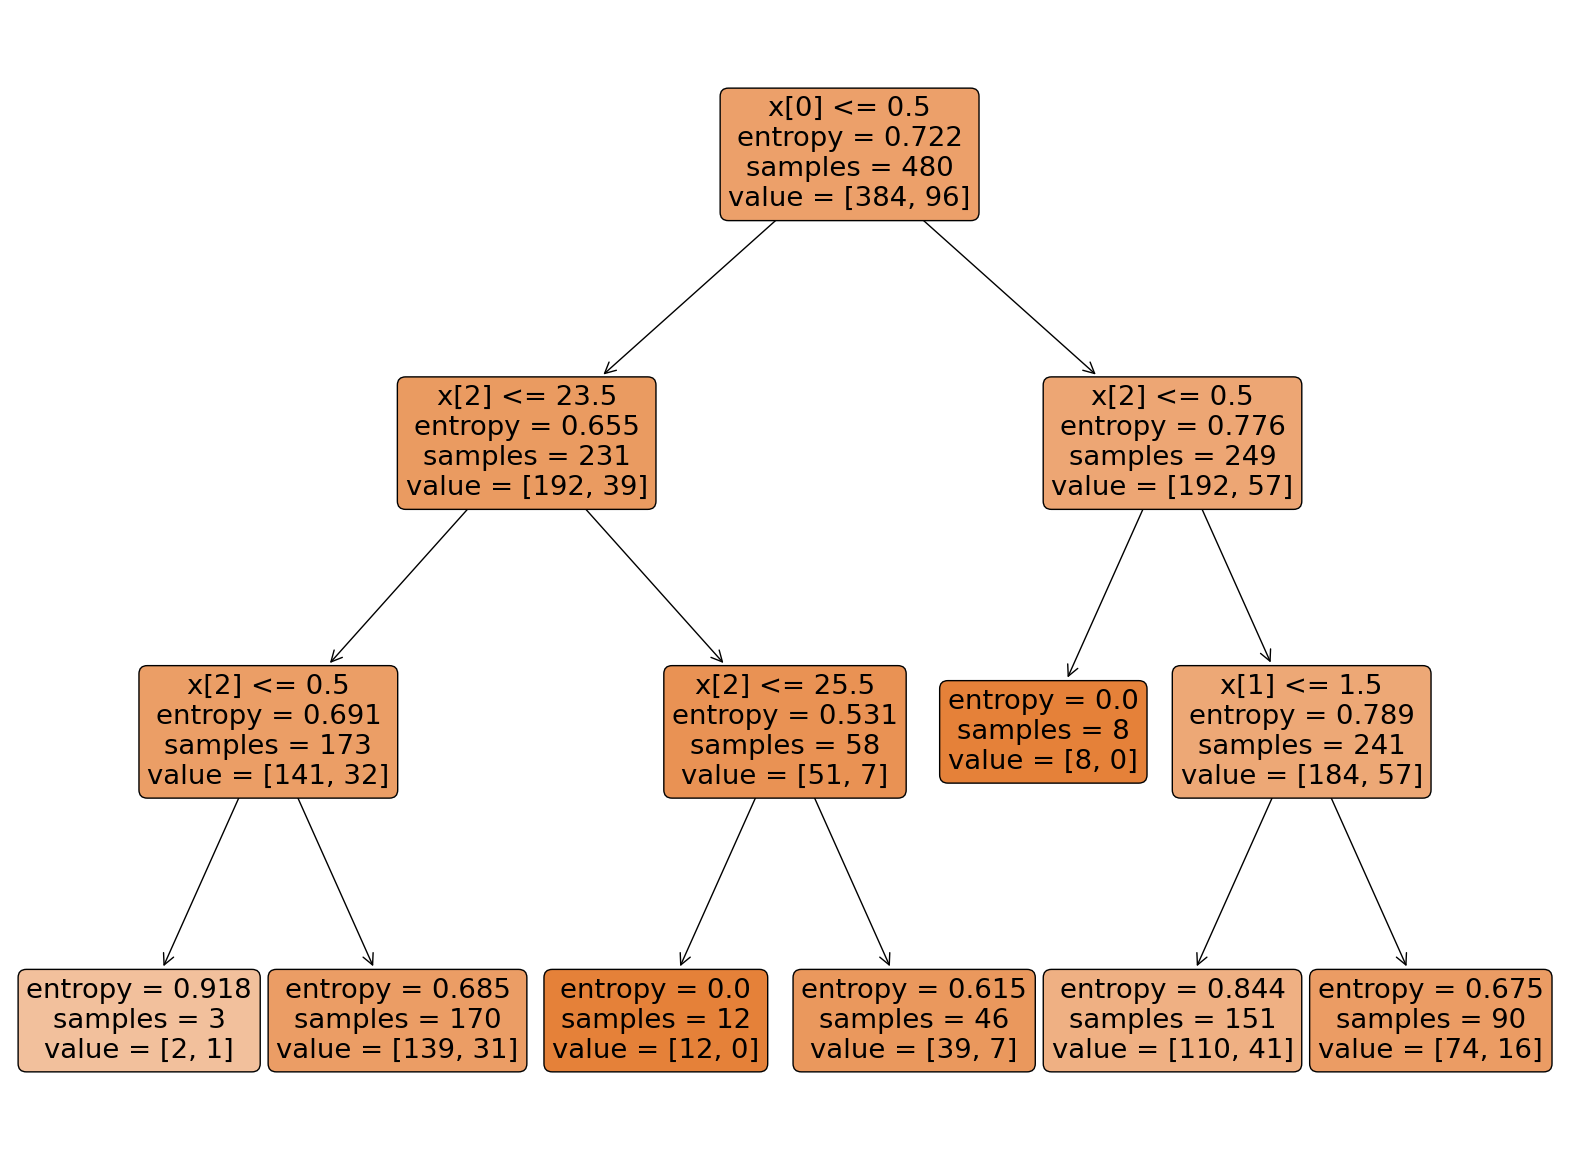

In [31]:
import matplotlib.pyplot as plt
# Prepare a plot figure with set size.
plt.figure(figsize = (20,15))
# Plot the decision tree.
plot_tree(model,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()

In [32]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,Good
tax_status,
Good,92
Risky,28


In [33]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



# Building Decision Tree Classifier (CART) using Gini Criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
#Prediction and computing the accuracy
pred=model_gini.predict(X_test)
np.mean(pred==Y_test)

0.7666666666666667

In [37]:
model_gini.get_n_leaves()

8

In [38]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



# Visualize

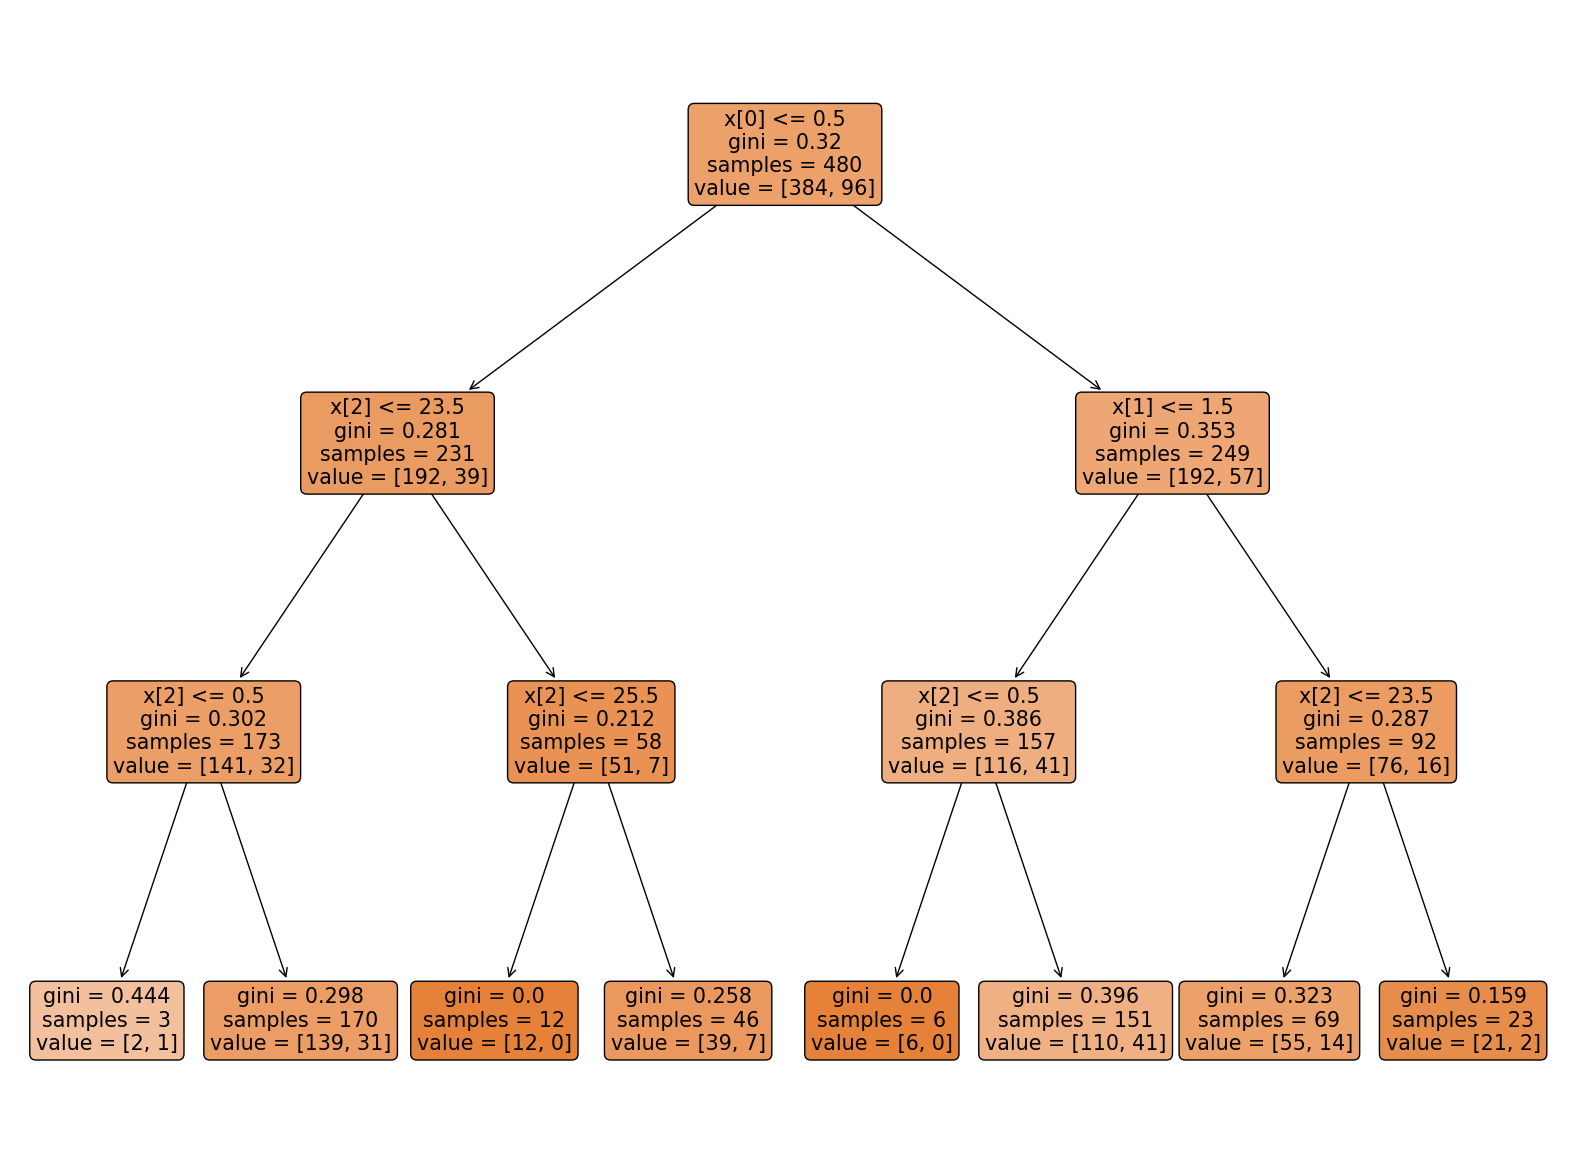

In [39]:
import matplotlib.pyplot as plt
# Prepare a plot figure with set size.
plt.figure(figsize = (20,15))
# Plot the decision tree.
plot_tree(model_gini,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()